### checking the discourse rate is also different

In [1]:
import pandas as pd
import spacy
nlp = spacy.load("en_core_web_lg")
import nltk
import re 
from nltk.tokenize import sent_tokenize

nltk.download("punkt")
nltk.download("stopwords")
nltk.download("wordnet")


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\somrita\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\somrita\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\somrita\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [2]:
def word_cnt(str1):
    words=str1.split()
    return len(words)

def discourse_marker():
    with open('../other/da.txt',"r") as file:
        text=file.read()
    d_list = text.split(",")
    #print(d_list)
    d_list.remove('')
    #index = d_list.index('')
    #print(index)
    #d_list.remove('')
    return d_list

def discourse_marker_check(essay):
    d_list=discourse_marker()
    count=0
    for marker in d_list:
        occurrences = re.findall(r'\b' + re.escape(marker) + r'\b', essay, flags=re.IGNORECASE)
        count += len(occurrences)
        #print("occurances ",occurrences," for marker ",marker)
    #print("count ",count)
    return count

In [3]:
df=pd.read_csv('../csv/combined_3.csv')

In [ ]:
# Split the DataFrame based on the 'label' column
df1 = df[df['label'] == 1]
df2 = df[df['label'] == 0]

# Display the resulting DataFrames
print("DataFrame 1 (label=1):")
print(df1)

print("\nDataFrame 2 (label=0):")
print(df2)

In [ ]:
df2

In [5]:
ess1=df1.loc[:,'essay']
ess2=df2.loc[:,'essay']

In [19]:
gpt_list=[]
hum_list=[]

In [20]:
for i in range(len(ess1)):
    d_count=discourse_marker_check(ess1[i])
    #print(swr)
    w_count=word_cnt(ess1[i])
    d_rate=d_count/w_count
    gpt_list.append(d_rate)

In [21]:
for i in range(150, 150 + len(ess2)):
    d_count=discourse_marker_check(ess2[i])
    #print(swr)
    w_count=word_cnt(ess2[i])
    d_rate=d_count/w_count
    hum_list.append(d_rate)

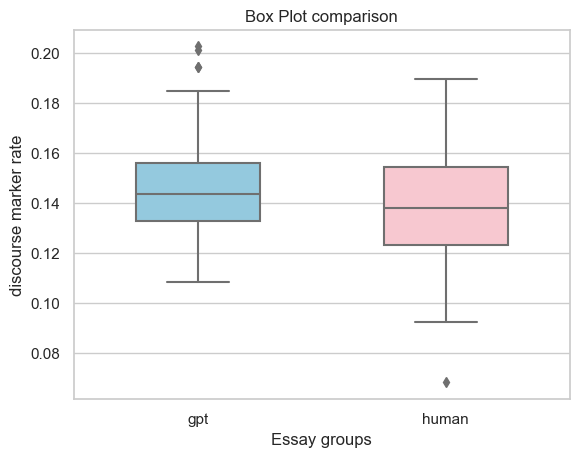

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt


# Combine the data into a single DataFrame (optional but can be helpful for labeling)
import pandas as pd

df = pd.DataFrame({'gpt': gpt_list, 'human': hum_list})

# Create the box plot with custom colors
colors = ["skyblue", "pink"]
sns.set(style="whitegrid")
sns.boxplot(data=df, palette=colors, width=0.5)
plt.xlabel("Essay groups")
plt.ylabel("discourse marker rate")
plt.title("Box Plot comparison")
plt.show()